In [14]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve


dataset = load_digits()
X, y = dataset.data, dataset.target

In [2]:
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 1' 
# Positive class (1) is 'digit 1'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


### Decision functions

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

[(0, -29.828780459938415),
 (0, -19.382864575567723),
 (0, -29.198485988549326),
 (0, -21.7462811868297),
 (0, -22.642377739406527),
 (0, -11.805934142347382),
 (1, 6.496007932165118),
 (0, -23.35461559536782),
 (0, -27.543802337523132),
 (0, -26.88821232962295),
 (0, -31.86295776995564),
 (0, -22.486083207071204),
 (0, -25.318027453891222),
 (0, -13.38452037628008),
 (0, -13.565642081633612),
 (0, -13.308354111208192),
 (1, 12.180932327131192),
 (0, -34.36243324370661),
 (0, -13.231542373873602),
 (0, -29.593981089164775)]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

[(0, 1.1105170847649497e-13),
 (0, 3.820576232926317e-09),
 (0, 2.0857327249994508e-13),
 (0, 3.595092578115769e-10),
 (0, 1.4673722122405463e-10),
 (0, 7.460101018575889e-06),
 (1, 0.9984928219943546),
 (0, 7.198123935063866e-11),
 (0, 1.0911353704623875e-12),
 (0, 2.101830824918265e-12),
 (0, 1.4524234875355467e-14),
 (0, 1.7156083190282255e-10),
 (0, 1.0104629266190328e-11),
 (0, 1.538778073808761e-06),
 (0, 1.2838548997732497e-06),
 (0, 1.6605598195276175e-06),
 (1, 0.9999948727312831),
 (0, 1.1928473154207381e-15),
 (0, 1.793136625223797e-06),
 (0, 1.4044210021803523e-13)]

### Precision-Recall curves

<IPython.core.display.Javascript object>


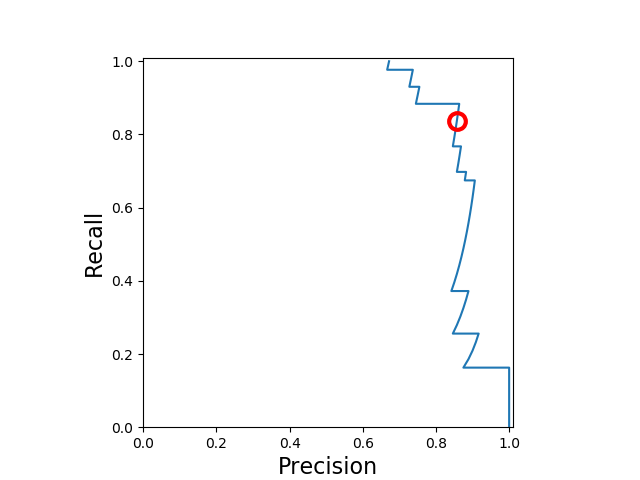

In [15]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()